# Корона вирус хугацааны таамаглал дэвшүүлэх нь
2020 оны эхэн үеэс эхэлсэн цар тахалын нас баралтын хэмжээг хугацааны таамаглал дэвшүүлэх даалгавар.
Энэхүү даалгавар нь үндсэн 3 хэсэгтэй бөгөөд үүнд:
1. Өгөгдлийг татах болон боловсруулах
2. Сургалтын загварыг боловсруулах
3. Сургалт болон дүгнэлт

##  Өгөгдлийг татах болон боловсруулах
https://ourworldindata.org/coronavirus/country/mongolia

In [55]:
import pandas as pd
import torch
import numpy as np
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, Normalizer, OneHotEncoder

from sklearn.model_selection import train_test_split


In [56]:
covid=pd.read_csv("owid-covid-data.csv")
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [57]:
covid_afg = covid[covid['location']=="Afghanistan"]

In [58]:
covid_afg.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [59]:
covid_afg["date"]=pd.to_datetime(covid_mongolia["date"])

C:\Users\User\AppData\Local\Temp/ipykernel_4816/1387684806.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
dates = pd.to_datetime(covid_afg["date"])

train_data = covid_afg[["date","new_people_vaccinated_smoothed", "new_cases_smoothed", "new_deaths_smoothed", "handwashing_facilities", "total_deaths"]]
# new_people_vaccinated_smoothed, new_cases_smoothed, new_deaths_smoothed
train_data["Year"] = dates.dt.year
train_data["Month"] = dates.dt.month
train_data["Day"] = dates.dt.day

C:\Users\User\AppData\Local\Temp/ipykernel_4816/2757712971.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp/ipykernel_4816/2757712971.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp/ipykernel_4816/2757712971.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [77]:
train_data.head()

,date,new_people_vaccinated_smoothed,new_cases_smoothed,new_deaths_smoothed,handwashing_facilities,total_deaths,Year,Month,Day
0,2020-02-24,NaN,NaN,NaN,37.746,NaN,2020,2,24
1,2020-02-25,NaN,NaN,NaN,37.746,NaN,2020,2,25
2,2020-02-26,NaN,NaN,NaN,37.746,NaN,2020,2,26
3,2020-02-27,NaN,NaN,NaN,37.746,NaN,2020,2,27
4,2020-02-28,NaN,NaN,NaN,37.746,NaN,2020,2,28


In [78]:
train_data = train_data.dropna()
train_data.head()

,date,new_people_vaccinated_smoothed,new_cases_smoothed,new_deaths_smoothed,handwashing_facilities,total_deaths,Year,Month,Day
365,2021-02-23,1367.0,18.286,1.000,37.746,2435.0,2021,2,23
366,2021-02-24,1367.0,17.714,1.143,37.746,2436.0,2021,2,24
367,2021-02-25,1367.0,17.571,1.143,37.746,2438.0,2021,2,25
368,2021-02-26,1367.0,17.286,1.714,37.746,2442.0,2021,2,26
369,2021-02-27,1367.0,18.143,1.857,37.746,2443.0,2021,2,27


In [79]:
print("Number of Confirmed Cases",covid_afg["total_cases"].iloc[-1], covid_afg["date"].iloc[-1])
print("Number of Recovered Cases",covid_afg["total_deaths"].iloc[-1], covid_afg["date"].iloc[-1])

Number of Confirmed Cases 199994.0 2022-10-06 00:00:00
Number of Recovered Cases 7804.0 2022-10-06 00:00:00


In [64]:
# train_data = train_data.drop(columns="date")

In [80]:
le = LabelEncoder()
normalizer = Normalizer()
onehot = OneHotEncoder()
# train_data["Year"] = le.fit_transform(train_data["Year"])
# train_data["Month"] = onehot.fit_transform(train_data["Month"])
# train_data["Day"] = onehot.fit_transform(train_data["Day"])

train_data["new_people_vaccinated_smoothed"] = train_data["new_people_vaccinated_smoothed"]/ np.max(train_data["new_people_vaccinated_smoothed"])
train_data["new_cases_smoothed"] = train_data["new_cases_smoothed"] / np.max(train_data["new_cases_smoothed"])
train_data["new_deaths_smoothed"] = train_data["new_deaths_smoothed"] / np.max(train_data["new_deaths_smoothed"])
train_data["new_deaths_smoothed"] = train_data["new_deaths_smoothed"] / np.max(train_data["new_deaths_smoothed"])
train_data.head()

,date,new_people_vaccinated_smoothed,new_cases_smoothed,new_deaths_smoothed,handwashing_facilities,total_deaths,Year,Month,Day
365,2021-02-23,0.007233,0.008726,0.010249,37.746,2435.0,2021,2,23
366,2021-02-24,0.007233,0.008453,0.011715,37.746,2436.0,2021,2,24
367,2021-02-25,0.007233,0.008385,0.011715,37.746,2438.0,2021,2,25
368,2021-02-26,0.007233,0.008249,0.017567,37.746,2442.0,2021,2,26
369,2021-02-27,0.007233,0.008658,0.019032,37.746,2443.0,2021,2,27


Feauture-ээ total_deaths гэж сонгоно 

In [81]:
X, y = train_data[["total_deaths","new_cases_smoothed"]].to_numpy(), train_data["new_deaths_smoothed"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    # stratify=train_data["new_deaths_smoothed"],
    test_size=0.3,
    random_state=1
)

In [82]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[:1], y_train[:1], X_test[:1], y_test[:1])


(411, 2) (411,) (177, 2) (177,)
[[7.78700000e+03 1.20117142e-01]] [0.00731775] [[7.73000000e+03 1.43159072e-02]] [0.0029312]


In [83]:
from sklearn.linear_model import LinearRegression, ARDRegression, GammaRegressor, HuberRegressor, LogisticRegression, ridge_regression, PassiveAggressiveRegressor, PoissonRegressor,QuantileRegressor,RANSACRegressor,SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
import sklearn

In [84]:
model = LinearRegression()


In [85]:
model.fit(X_train,y_train)

LinearRegression()

In [86]:
preds = model.predict(X_test)

In [87]:
models = ["LinearRegression", "ARDRegression", #"GammaRegressor", "LogisticRegression","ridge_regression","StackingRegressor",, "VotingRegressor"
        "PassiveAggressiveRegressor", 
        "PoissonRegressor","QuantileRegressor","RANSACRegressor","SGDRegressor",
        "RandomForestRegressor", "AdaBoostRegressor", "GradientBoostingRegressor", 
        "BaggingRegressor", "HistGradientBoostingRegressor"]
def get_model(model_name):
    if model_name == "LinearRegression":
        return LinearRegression()
    elif model_name == "ARDRegression":
        return ARDRegression()
    elif model_name == "GammaRegressor":
        return GammaRegressor()
    elif model_name == "LogisticRegression":
        return LogisticRegression()
    elif model_name == "ridge_regression":
        return ridge_regression()
    elif model_name == "PassiveAggressiveRegressor":
        return PassiveAggressiveRegressor()
    elif model_name == "PoissonRegressor":
        return PoissonRegressor()
    elif model_name == "QuantileRegressor":
        return QuantileRegressor()
    elif model_name == "RANSACRegressor":
        return RANSACRegressor()
    elif model_name == "SGDRegressor":
        return SGDRegressor()
    elif model_name == "RandomForestRegressor":
        return RandomForestRegressor()
    elif model_name == "AdaBoostRegressor":
        return AdaBoostRegressor()
    elif model_name == "GradientBoostingRegressor":
        return GradientBoostingRegressor()
    elif model_name == "BaggingRegressor":
        return BaggingRegressor()
    elif model_name == "HistGradientBoostingRegressor":
        return HistGradientBoostingRegressor()
    elif model_name == "StackingRegressor":
        return StackingRegressor()
    else:
        return VotingRegressor()


def train_models():
    for model_name in models:
        print(model_name)
        model = get_model(model_name)
        model.fit(X_train,y_train)
        preds = model.predict(X_test)
        plt.plot(covid_mongolia["date"][-len(y_test):],preds)
        plt.plot(covid_mongolia["date"][-len(y_test):],y_test)
        plt.title(model_name + ": {:.4f} average: {:.2f}".format(mse(preds, y_test), mse(preds, y_test)*np.max(covid_mongolia["new_deaths_smoothed"])))
        plt.grid()
        plt.show()
        

LinearRegression


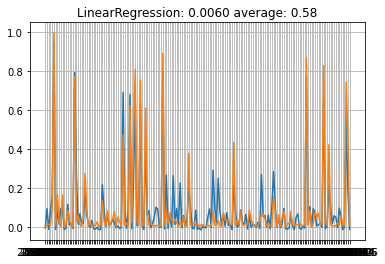

ARDRegression


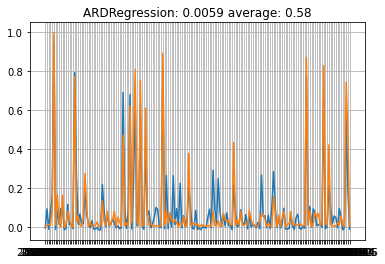

PassiveAggressiveRegressor


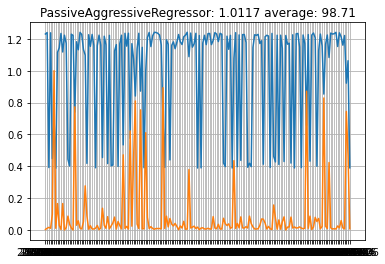

PoissonRegressor


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning:

invalid value encountered in multiply

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\_loss\glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\_loss\glm_distribution.py:323: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning:

lbfgs failed to converge (st

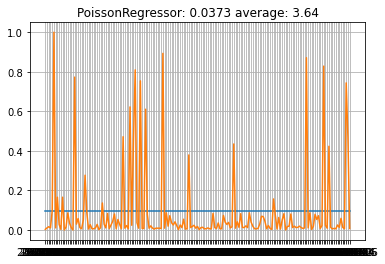

QuantileRegressor


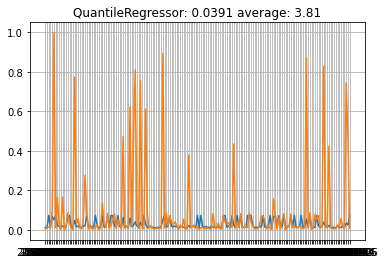

RANSACRegressor


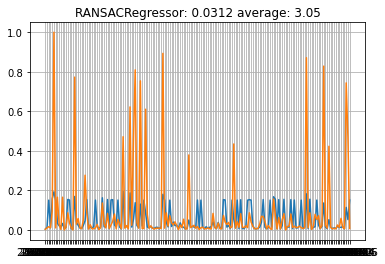

SGDRegressor


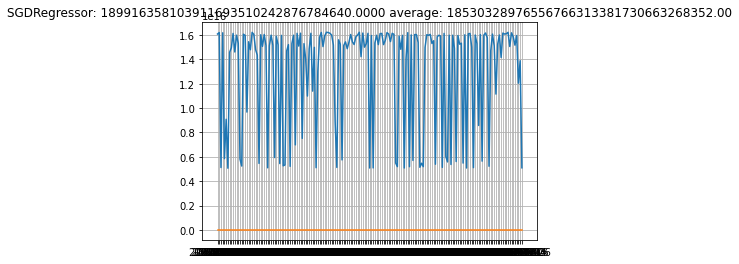

RandomForestRegressor


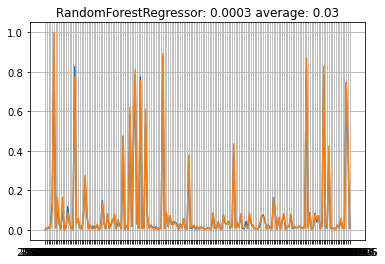

AdaBoostRegressor


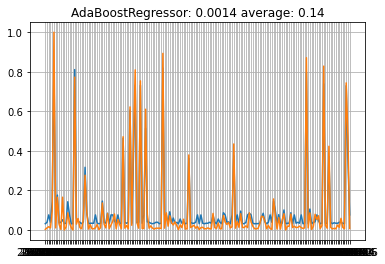

GradientBoostingRegressor


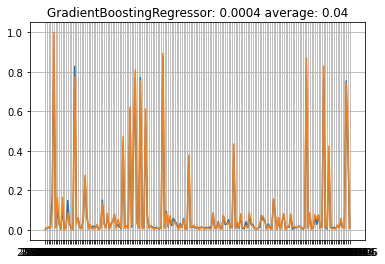

BaggingRegressor


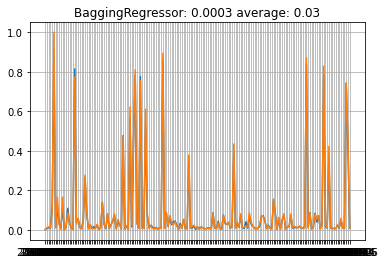

HistGradientBoostingRegressor


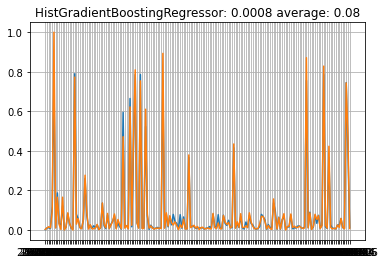

In [88]:
train_models()

LAB Daalgavar

In [74]:
dates = pd.to_datetime(covid_mongolia["date"])

train_data = covid_mongolia[["date","new_people_vaccinated_smoothed", "new_cases_smoothed", "new_deaths_smoothed", "handwashing_facilities"]]
# new_people_vaccinated_smoothed, new_cases_smoothed, new_deaths_smoothed
train_data["Year"] = dates.dt.year
train_data["Month"] = dates.dt.month
train_data["Day"] = dates.dt.day

C:\Users\User\AppData\Local\Temp/ipykernel_4816/813731082.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp/ipykernel_4816/813731082.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp/ipykernel_4816/813731082.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [75]:
train_data = train_data.dropna()
train_data.head()

,date,new_people_vaccinated_smoothed,new_cases_smoothed,new_deaths_smoothed,handwashing_facilities,Year,Month,Day
365,2021-02-23,1367.0,18.286,1.000,37.746,2021,2,23
366,2021-02-24,1367.0,17.714,1.143,37.746,2021,2,24
367,2021-02-25,1367.0,17.571,1.143,37.746,2021,2,25
368,2021-02-26,1367.0,17.286,1.714,37.746,2021,2,26
369,2021-02-27,1367.0,18.143,1.857,37.746,2021,2,27
